In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender',

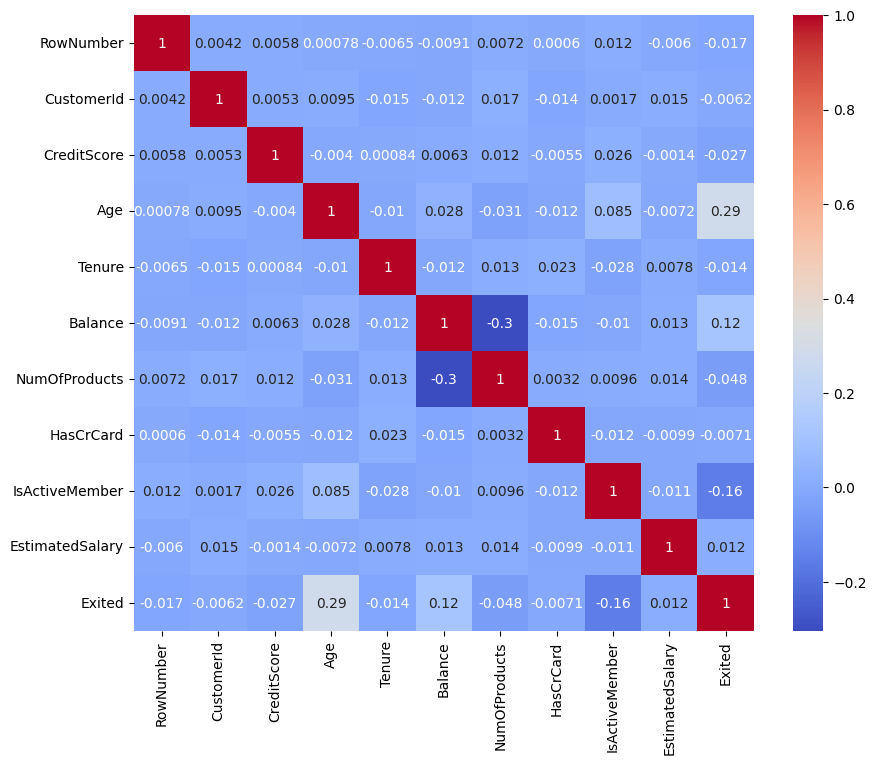

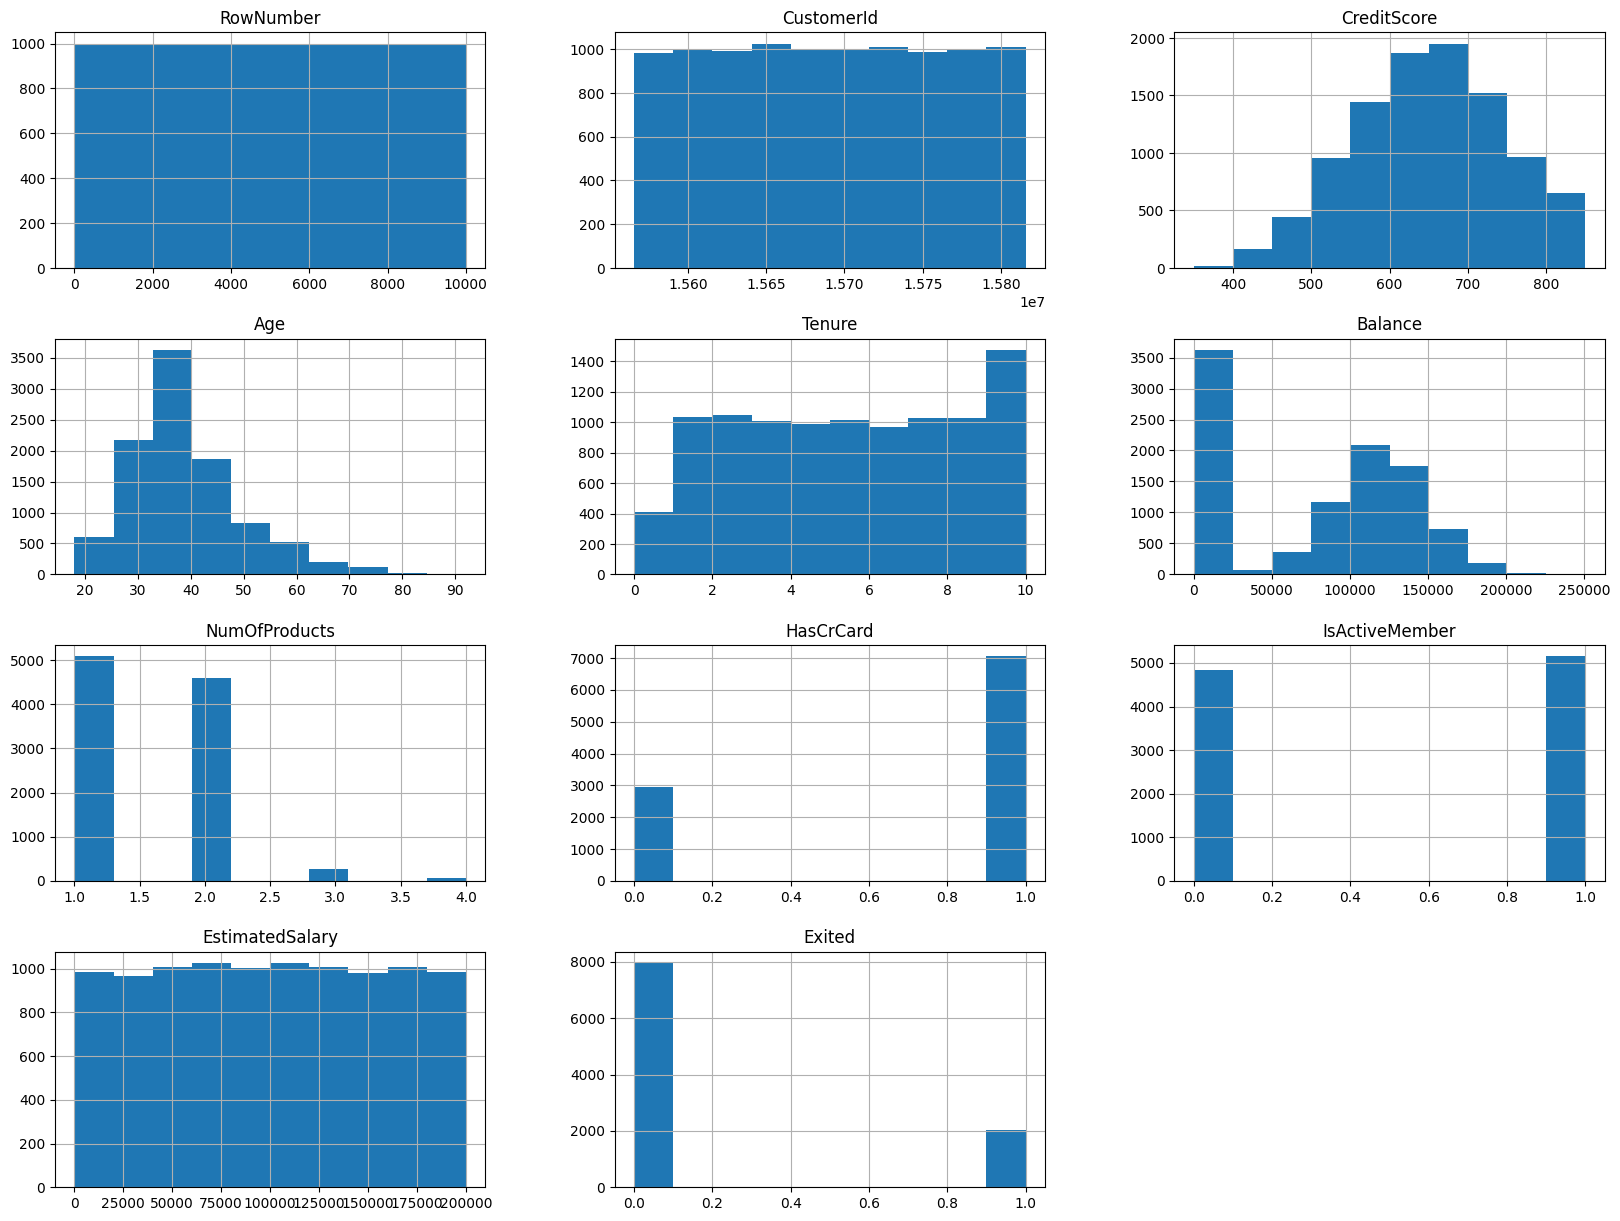

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

df.hist(bins=10, figsize=(20,15))
plt.show()

## Cleaning The Data

In [6]:
import pandas as pd

# Check for missing values
print(df.isnull().sum())

df=df.drop(['Surname','CustomerId','RowNumber'],axis=1)
# Check for missing values again
print(df)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts   
0             619    France  Female   42       2       0.00              1  \
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61          

In [19]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

def binary_classification(df):
    # Label encode categorical features
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    df['Geography'] = le.fit_transform(df['Geography'])
    print (df.describe().loc[['min', 'max']].T)
    # Drop the target column
    X = df.drop('Exited', axis=1)
    y = df['Exited']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Initialize the classifiers
    log_reg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()

    # Train the classifiers
    log_reg.fit(X_train, y_train)
    dtc.fit(X_train, y_train)
    rfc.fit(X_train, y_train)

    # Evaluate the classifiers
    log_reg_preds = log_reg.predict(X_test)
    dtc_preds = dtc.predict(X_test)
    rfc_preds = rfc.predict(X_test)

    log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
    log_reg_precision = precision_score(y_test, log_reg_preds)
    log_reg_recall = recall_score(y_test, log_reg_preds)
    log_reg_f1 = f1_score(y_test, log_reg_preds)

    dtc_accuracy = accuracy_score(y_test, dtc_preds)
    dtc_precision = precision_score(y_test, dtc_preds)
    dtc_recall = recall_score(y_test, dtc_preds)
    dtc_f1 = f1_score(y_test, dtc_preds)

    rfc_accuracy = accuracy_score(y_test, rfc_preds)
    rfc_precision = precision_score(y_test, rfc_preds)
    rfc_recall = recall_score(y_test, rfc_preds)
    rfc_f1 = f1_score(y_test, rfc_preds)

    # Print the performance metrics of each classifier
    print('Logistic Regression Performance Metrics')
    print('Accuracy:', log_reg_accuracy)
    print('Precision:', log_reg_precision)
    print('Recall:', log_reg_recall)
    print('F1 Score:', log_reg_f1)
    print()

    print('Decision Tree Classifier Performance Metrics')
    print('Accuracy:', dtc_accuracy)
    print('Precision:', dtc_precision)
    print('Recall:', dtc_recall)
    print('F1 Score:', dtc_f1)
    print()

    print('Random Forest Classifier Performance Metrics')
    print('Accuracy:', rfc_accuracy)
    print('Precision:', rfc_precision)
    print('Recall:', rfc_recall)
    print('F1 Score:', rfc_f1)
    print()
    
    with open('log_reg.pkl', 'wb') as f:
        pickle.dump(log_reg, f)
    with open('dtc.pkl', 'wb') as f:
        pickle.dump(dtc, f)
    with open('rfc.pkl', 'wb') as f:
        pickle.dump(rfc, f)
binary_classification(df)

                    min        max
CreditScore      350.00     850.00
Geography          0.00       2.00
Gender             0.00       1.00
Age               18.00      92.00
Tenure             0.00      10.00
Balance            0.00  250898.09
NumOfProducts      1.00       4.00
HasCrCard          0.00       1.00
IsActiveMember     0.00       1.00
EstimatedSalary   11.58  199992.48
Exited             0.00       1.00
Logistic Regression Performance Metrics
Accuracy: 0.8005
Precision: 0.45161290322580644
Recall: 0.07124681933842239
F1 Score: 0.12307692307692307

Decision Tree Classifier Performance Metrics
Accuracy: 0.784
Precision: 0.45770065075921906
Recall: 0.5368956743002544
F1 Score: 0.4941451990632318

Random Forest Classifier Performance Metrics
Accuracy: 0.868
Precision: 0.7698744769874477
Recall: 0.4681933842239186
F1 Score: 0.5822784810126582



In [20]:
import numpy as np
import pickle

# Load the trained model from the pickle file
with open('rfc.pkl', 'rb') as f:
    rfc = pickle.load(f)

# Define a new input data for prediction
new_data = np.array([[random.randint(300, 900),  # CreditScore
                      random.choice([0,2]),  # Geography
                      random.choice([0,1]),  # Gender
                      random.randint(18, 70),  # Age
                      random.randint(0, 10),  # Tenure
                      random.uniform(0, 200000),  # Balance
                      random.randint(1, 4),  # NumOfProducts
                      random.choice([0, 1]),  # HasCrCard
                      random.choice([0, 1]),  # IsActiveMember
                      random.uniform(0, 200000)]])

# Predict the output for the new input data using the loaded model

prediction = rfc.predict(new_data)

# Print the predicted output
print(prediction)

[1]


/home/ak2704/bank_churn_prediction/myenv/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
